In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "C:/Users/123/Datasets/STFT/training"

In [3]:
CATEGORIES = ["STFT0", "STFT1", "STFT2"]

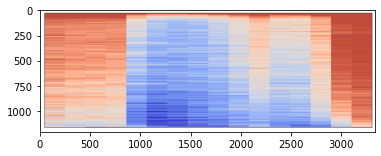

In [4]:
for category in CATEGORIES:  # do green, yellow, red
    path = os.path.join(DATADIR,category)  # create path to green, yellow, red
    for img in os.listdir(path):  # 在每個圖像上重複 green, yellow, red
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
cv2.imread("C:/Users/123/Datasets/STFT/training/STFT0/01.PNG")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
cv2.imread("C:/Users/123/Datasets/STFT/training/STFT0/01.PNG").shape

(1207, 3329, 3)

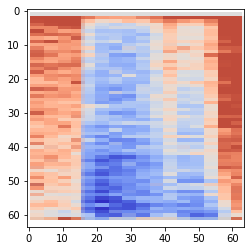

In [7]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
new_array.shape

(64, 64, 3)

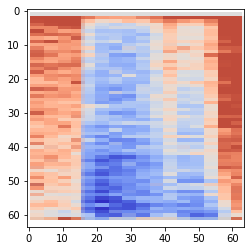

In [9]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do green, yellow, red

        path = os.path.join(DATADIR,category)  # create path togreen, yellow, red
        class_num = CATEGORIES.index(category)  # get the classification  (0 or 1 or 2). 0=green, 1=yellow, 2=red

        for img in tqdm(os.listdir(path)):  # iterate over each image per green, yellow, red
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            


create_training_data()



print(len(training_data))


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 14.49it/s]

109


In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
2
0
1
0
0
2


In [13]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[216]
   [229]
   [208]
   ...
   [155]
   [255]
   [188]]

  [[155]
   [255]
   [188]
   ...
   [233]
   [233]
   [233]]

  [[255]
   [255]
   [255]
   ...
   [220]
   [215]
   [226]]]


 [[[220]
   [215]
   [226]
   ...
   [181]
   [250]
   [205]]

  [[181]
   [250]
   [205]
   ...
   [233]
   [233]
   [233]]

  [[255]
   [255]
   [255]
   ...
   [213]
   [197]
   [240]]

  ...

  [[217]
   [224]
   [220]
   ...
   [233]
   [233]
   [233]]

  [[255]
   [255]
   [255]
   ...
   [220]
   [214]
   [227]]

  [[220]
   [214]
   [227]
   ...
   [229]
   [208]
   [215]]]


 [[[229]
   [208]
   [215]
   ...
   [233]
   [233]
   [233]]

  [[255]
   [255]
   [255]
   ...
   [199]
   [243]
   [176]]

  [[199]
   [243]
   [176]
   ...
   [188]
   [247]
   [209]]

  ...

  [[255]
   [255]
   [255]
   

In [14]:
X.shape

(109, 64, 64, 3)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, TimeDistributed, Bidirectional

from keras.utils import np_utils


import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y=np_utils.to_categorical(y)

Using TensorFlow backend.


In [18]:
y.shape

(109, 3)

In [19]:
#Add CNN model
model = Sequential()

model.add(Conv2D(filters=16,
               kernel_size=(3, 3),
               padding="same",
               input_shape=(64, 64, 3),
               activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64,
               kernel_size=(3, 3),
               padding="same",
               activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(tf.keras.layers.Reshape((16384,1), input_shape=(None, 16, 16, 1)))
#16*16*64
model.output_shape


#Add LSTM



model.add(LSTM(4,return_sequences=True,
               batch_input_shape=(None,32,1)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(3,
                activation='softmax' ))



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________

In [20]:
train_history=model.fit(X,
                       y, validation_split=0.2,
                       epochs=10, batch_size=15,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 87 samples, validate on 22 samples
Epoch 1/10
87/87 - 121s - loss: 0.7515 - acc: 0.6552 - val_loss: 0.6464 - val_acc: 0.6667
Epoch 2/10
87/87 - 121s - loss: 0.6335 - acc: 0.6552 - val_loss: 0.5503 - val_acc: 0.7273
Epoch 3/10
87/87 - 156s - loss: 0.5795 - acc: 0.6973 - val_loss: 0.5278 - val_acc: 0.7273
Epoch 4/10
87/87 - 145s - loss: 0.5708 - acc: 0.7241 - val_loss: 0.5044 - val_acc: 0.7424
Epoch 5/10
87/87 - 119s - loss: 0.5580 - acc: 0.7356 - val_loss: 0.4984 - val_acc: 0.7273
Epoch 6/10
87/87 - 123s - loss: 0.5633 - acc: 0.6935 - val_loss: 0.5198 - val_acc: 0.7576
Epoch 7/10
87/87 - 124s - loss: 0.5358 - acc: 0.7548 - val_loss: 0.4965 - val_acc: 0.7273
Epoch 8/10
87/87 - 129s - loss: 0.5523 - acc: 0.7165 - val_loss: 0.5093 - val_acc: 0.7727
Epoch 9/10
87/87 - 128s - loss: 0.5206 - acc: 0.7471 - val_loss: 0.4871 - val_acc: 0.7424
Epoch 10/10
87/87 - 137s - loss: 0.5066 - acc: 0.751

In [21]:
scores=model.evaluate(X,
                      y)
scores[1]

109/109 [==============================] - 14s 128ms/sample - loss: 0.4772 - acc: 0.7829


0.78287464

In [22]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

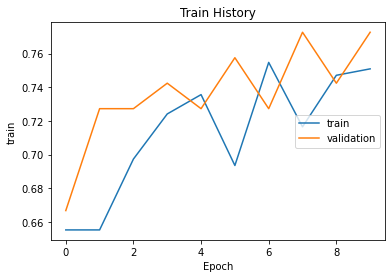

In [23]:
show_train_history(train_history,'acc','val_acc')

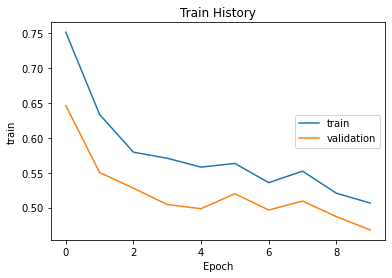

In [24]:
show_train_history(train_history, 'loss','val_loss')